#  Logistic Regression
## Classifying Handwritten Numbers
### Manipulate The Data

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show the data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label:  8


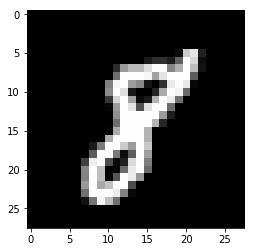

In [2]:
# Display one of the 60,000 images in x_train
i = np.where(y_train == 8)[0][0]
print("label: ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap = cm.gray)
plt.show()

In [3]:
# Reshape the data to a flat array
x_train = x_train.reshape(60000, 28 * 28)
print(x_train.shape)

# One-hot encode the labels
y_train = to_categorical(y_train)
print(y_train.shape)
print("label: ", y_train[i, :])

(60000, 784)
(60000, 10)
label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Control Model 1:
- One hidden layer
- 16 nodes

In [4]:
# Create validation set
from sklearn.model_selection import train_test_split

x_train_part, x_train_val, y_train_part, y_train_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42, stratify = np.argmax(y_train, axis = 1))

# Define logistic regression classification model
from keras import models
from keras import layers
from keras import optimizers

model_control1 = models.Sequential()
model_control1.add(layers.Dense(16, activation = 'relu', input_shape = (784,)))
model_control1.add(layers.Dense(10, activation = 'softmax'))

# Compile model
model_control1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit model
eps = 25
history = model_control1.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 24us/step - loss: 8.1788 - acc: 0.4588 - val_loss: 5.5803 - val_acc: 0.6024
Epoch 2/25
48000/48000 [==============================] - 1s 20us/step - loss: 3.4835 - acc: 0.6264 - val_loss: 1.5777 - val_acc: 0.5477
Epoch 3/25
48000/48000 [==============================] - 1s 23us/step - loss: 1.3355 - acc: 0.6175 - val_loss: 1.1582 - val_acc: 0.6971
Epoch 4/25
48000/48000 [==============================] - 1s 23us/step - loss: 1.0340 - acc: 0.7371 - val_loss: 0.9909 - val_acc: 0.7540
Epoch 5/25
48000/48000 [==============================] - 1s 17us/step - loss: 0.8963 - acc: 0.7817 - val_loss: 0.9339 - val_acc: 0.7983
Epoch 6/25
48000/48000 [==============================] - 1s 19us/step - loss: 0.8010 - acc: 0.8088 - val_loss: 0.8249 - val_acc: 0.8037
Epoch 7/

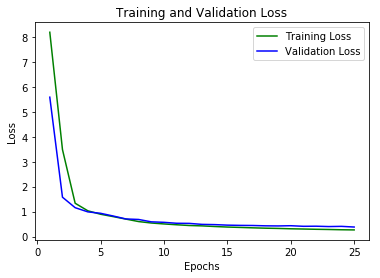

In [5]:
# Plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

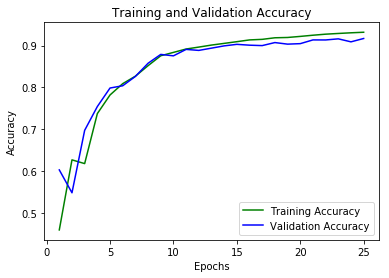

In [6]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
# 
# Examine the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_control1.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[ 923,    0,    2,    1,    0,    5,   14,    2,   33,    0],
       [   0, 1105,    7,    0,    0,    1,    5,    0,   17,    0],
       [   2,    4,  968,    8,    4,    1,    6,    6,   31,    2],
       [   2,    0,   31,  892,    0,   21,    2,    7,   50,    5],
       [   0,    2,    2,    0,  886,    1,   14,    1,   47,   29],
       [   3,    1,    1,   37,    1,  791,   14,    1,   42,    1],
       [   5,    3,    4,    1,    8,    8,  920,    0,    9,    0],
       [   2,    6,   35,    8,    7,    1,    0,  929,   11,   29],
       [   0,    5,   15,    4,    7,   10,    6,    3,  920,    4],
       [   5,    5,    0,   13,   47,    6,    1,    7,   42,  883]])

In [8]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       980
           1       0.98      0.97      0.98      1135
           2       0.91      0.94      0.92      1032
           3       0.93      0.88      0.90      1010
           4       0.92      0.90      0.91       982
           5       0.94      0.89      0.91       892
           6       0.94      0.96      0.95       958
           7       0.97      0.90      0.94      1028
           8       0.77      0.94      0.85       974
           9       0.93      0.88      0.90      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



### Control Model 2:
- Two hidden layers
- 32 & 16 nodes

In [9]:
# Retry the model using two hidden layers
model_control2 = models.Sequential()
model_control2.add(layers.Dense(32, activation = 'relu', input_shape = (784,)))
model_control2.add(layers.Dense(16, activation = 'relu'))
model_control2.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_control2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 25
history = model_control2.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 25us/step - loss: 6.8483 - acc: 0.5424 - val_loss: 4.7683 - val_acc: 0.6758
Epoch 2/25
48000/48000 [==============================] - 1s 18us/step - loss: 3.6866 - acc: 0.7434 - val_loss: 2.9747 - val_acc: 0.7929
Epoch 3/25
48000/48000 [==============================] - 1s 21us/step - loss: 2.7125 - acc: 0.8092 - val_loss: 2.6936 - val_acc: 0.8061
Epoch 4/25
48000/48000 [==============================] - 1s 24us/step - loss: 1.9940 - acc: 0.8487 - val_loss: 1.6890 - val_acc: 0.8608
Epoch 5/25
48000/48000 [==============================] - 1s 22us/step - loss: 1.4464 - acc: 0.8833 - val_loss: 1.2923 - val_acc: 0.8946
Epoch 6/25
48000/48000 [==============================] - 1s 21us/step - loss: 1.1616 - acc: 0.9031 - val_loss: 1.2363 - val_acc: 0.8963
Epoch 7/25
48000/48000 [==============================] - 1s 23us/step - loss: 1.0330 - acc: 0.9123 - val_loss: 0.9941 - val_acc

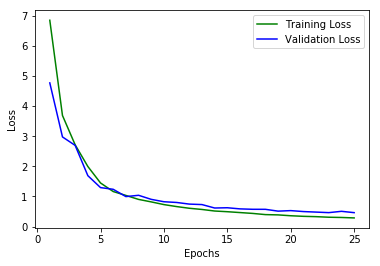

In [10]:
# Plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

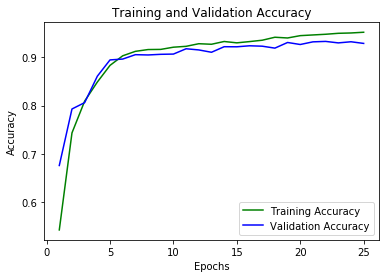

In [11]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# Examine the confusion
y_pred = model_control2.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[ 958,    1,    6,    1,    0,    2,    3,    1,    5,    3],
       [   0, 1114,    4,    2,    1,    1,    2,    0,    9,    2],
       [  12,    5,  953,   10,    7,    2,    3,   14,   25,    1],
       [   0,    2,    6,  916,    0,   35,    1,   16,   33,    1],
       [   4,    2,    6,    0,  907,    0,    5,    6,   25,   27],
       [   7,    7,    2,   16,    1,  797,    9,    4,   43,    6],
       [  14,    5,    6,    0,    8,    6,  914,    0,    2,    3],
       [   0,   14,   16,    7,    2,    1,    0,  972,   11,    5],
       [  10,    0,   18,   16,    3,   11,   11,   12,  887,    6],
       [   5,    8,    0,    6,   19,    4,    0,   78,   44,  845]])

In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.94      0.91      0.92      1010
           4       0.96      0.92      0.94       982
           5       0.93      0.89      0.91       892
           6       0.96      0.95      0.96       958
           7       0.88      0.95      0.91      1028
           8       0.82      0.91      0.86       974
           9       0.94      0.84      0.89      1009

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### Experiment Model 1:
- One hidden layer
- 100 nodes

In [14]:
model_experiment1 = models.Sequential()
model_experiment1.add(layers.Dense(100, activation = 'relu', input_shape = (784,)))
model_experiment1.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_experiment1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 25
history = model_experiment1.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 37us/step - loss: 9.3167 - acc: 0.4166 - val_loss: 7.3263 - val_acc: 0.5413
Epoch 2/25
48000/48000 [==============================] - 2s 31us/step - loss: 7.1452 - acc: 0.5529 - val_loss: 6.9512 - val_acc: 0.5662
Epoch 3/25
48000/48000 [==============================] - 1s 25us/step - loss: 6.9944 - acc: 0.5629 - val_loss: 7.1232 - val_acc: 0.5544
Epoch 4/25
48000/48000 [==============================] - 2s 34us/step - loss: 6.8915 - acc: 0.5704 - val_loss: 6.8039 - val_acc: 0.5755
Epoch 5/25
48000/48000 [==============================] - 2s 34us/step - loss: 6.8308 - acc: 0.5740 - val_loss: 6.9302 - val_acc: 0.5677
Epoch 6/25
48000/48000 [==============================] - 2s 35us/step - loss: 6.6985 - acc: 0.5821 - val_loss: 5.6714 - val_acc: 0.6443
Epoch 7/25
48000/48000 [==============================] - 2s 34us/step - loss: 5.3673 - acc: 0.6643 - val_loss: 5.3411 - val_acc

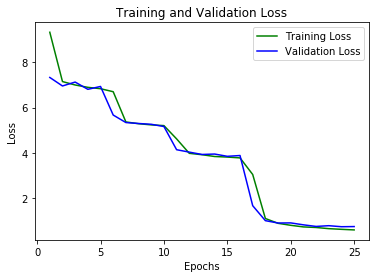

In [15]:
# Plot the learning parameters
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

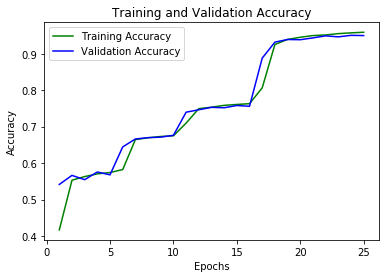

In [16]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# Examine the confusion
y_pred = model_experiment1.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[ 969,    0,    0,    2,    1,    2,    4,    1,    1,    0],
       [   0, 1116,    5,    7,    0,    1,    2,    1,    3,    0],
       [   7,    2,  977,    8,   11,    0,    4,   10,   13,    0],
       [   4,    0,   20,  947,    0,   12,    0,   14,   10,    3],
       [   1,    0,    3,    0,  962,    0,    3,    1,    3,    9],
       [  14,    1,    0,   34,    1,  824,    5,    5,    7,    1],
       [  15,    3,    1,    1,    9,   12,  912,    1,    3,    1],
       [   0,    2,   12,    8,    7,    1,    0,  992,    2,    4],
       [   4,    1,    4,   29,    6,   14,    5,    8,  898,    5],
       [   5,    6,    1,   17,   26,    4,    1,   21,    5,  923]])

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.90      0.94      0.92      1010
           4       0.94      0.98      0.96       982
           5       0.95      0.92      0.94       892
           6       0.97      0.95      0.96       958
           7       0.94      0.96      0.95      1028
           8       0.95      0.92      0.94       974
           9       0.98      0.91      0.94      1009

   micro avg       0.95      0.95      0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### Experiment Model 2:
- One hidden layer
- 400 nodes

In [25]:
model_experiment2 = models.Sequential()
model_experiment2.add(layers.Dense(400, activation = 'relu', input_shape = (784,)))
model_experiment2.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_experiment2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 25
history = model_experiment2.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 3s 72us/step - loss: 8.6442 - acc: 0.4583 - val_loss: 5.9293 - val_acc: 0.6282
Epoch 2/25
48000/48000 [==============================] - 3s 67us/step - loss: 5.2252 - acc: 0.6710 - val_loss: 4.3817 - val_acc: 0.7243
Epoch 3/25
48000/48000 [==============================] - 3s 65us/step - loss: 4.4012 - acc: 0.7233 - val_loss: 4.2543 - val_acc: 0.7327
Epoch 4/25
48000/48000 [==============================] - 4s 77us/step - loss: 4.2389 - acc: 0.7337 - val_loss: 4.2006 - val_acc: 0.7361
Epoch 5/25
48000/48000 [==============================] - 3s 72us/step - loss: 4.1086 - acc: 0.7423 - val_loss: 4.3785 - val_acc: 0.7246
Epoch 6/25
48000/48000 [==============================] - 4s 75us/step - loss: 3.9916 - acc: 0.7496 - val_loss: 3.9397 - val_acc: 0.7529
Epoch 7/25
48000/48000 [==============================] - 3s 60us/step - loss: 3.9944 - acc: 0.7500 - val_loss: 3.9779 - val_acc

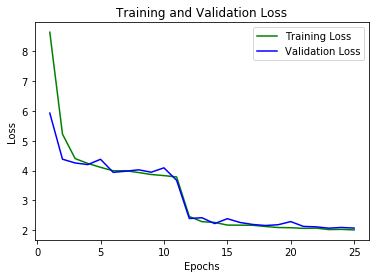

In [26]:
# Plot the learning parameters
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

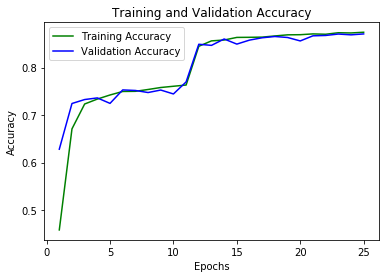

In [27]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
# Examine the confusion
y_pred = model_experiment2.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[ 970,    0,    0,    1,    0,    3,    1,    3,    2,    0],
       [   1, 1123,    0,    3,    0,    1,    1,    2,    4,    0],
       [ 107,   76,    0,  459,   45,    4,   57,   97,  174,   13],
       [   4,    0,    0,  960,    0,   13,    0,    8,   19,    6],
       [   3,    0,    0,    0,  958,    0,    6,    2,    1,   12],
       [   6,    0,    0,    3,    0,  875,    3,    0,    2,    3],
       [  17,    5,    0,    0,    3,   14,  914,    1,    4,    0],
       [   1,    6,    0,    3,    8,    1,    0,  993,    1,   15],
       [  12,    0,    0,    5,    6,   17,    2,    7,  923,    2],
       [   8,    4,    0,    2,   18,    3,    1,    8,    5,  960]])

In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       980
           1       0.93      0.99      0.96      1135
           2       0.00      0.00      0.00      1032
           3       0.67      0.95      0.78      1010
           4       0.92      0.98      0.95       982
           5       0.94      0.98      0.96       892
           6       0.93      0.95      0.94       958
           7       0.89      0.97      0.92      1028
           8       0.81      0.95      0.88       974
           9       0.95      0.95      0.95      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.79      0.87      0.83     10000
weighted avg       0.79      0.87      0.82     10000



### Experiment 3:
- Two hidden layers
- 200 & 200 nodes

In [53]:
model_experiment4 = models.Sequential()
model_experiment4.add(layers.Dense(200, activation = 'relu', input_shape = (784,)))
model_experiment4.add(layers.Dense(200, activation = 'relu'))
model_experiment4.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_experiment4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 25
history = model_experiment4.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 3s 71us/step - loss: 12.2024 - acc: 0.2413 - val_loss: 11.6141 - val_acc: 0.2784
Epoch 2/25
48000/48000 [==============================] - 3s 56us/step - loss: 10.2438 - acc: 0.3628 - val_loss: 9.9867 - val_acc: 0.3790
Epoch 3/25
48000/48000 [==============================] - 3s 53us/step - loss: 9.8453 - acc: 0.3879 - val_loss: 9.9229 - val_acc: 0.3833
Epoch 4/25
48000/48000 [==============================] - 3s 65us/step - loss: 8.6781 - acc: 0.4596 - val_loss: 8.2774 - val_acc: 0.4845
Epoch 5/25
48000/48000 [==============================] - 3s 68us/step - loss: 8.2114 - acc: 0.4891 - val_loss: 8.2891 - val_acc: 0.4847
Epoch 6/25
48000/48000 [==============================] - 4s 76us/step - loss: 8.1952 - acc: 0.4905 - val_loss: 8.1754 - val_acc: 0.4912
Epoch 7/25
48000/48000 [==============================] - 4s 82us/step - loss: 8.1577 - acc: 0.4932 - val_loss: 8.3103 - val_

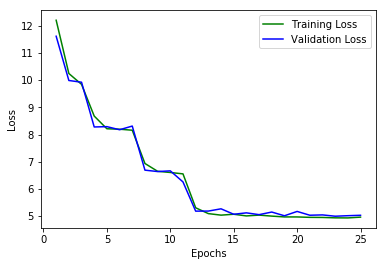

In [54]:
# Plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

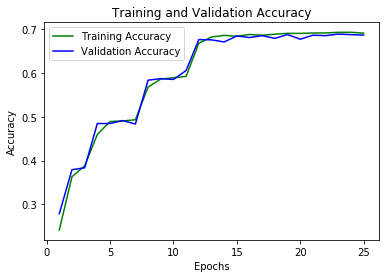

In [55]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [56]:
# Examine the confusion
y_pred = model_experiment3.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[  0,  37,   0,   0,   0,   7,   7, 701, 147,  81],
       [  1,   4,   0,   0,   0,  96, 406, 232,  96, 300],
       [  0, 135,   2,   0,   0,  22, 107, 508, 208,  50],
       [  3,  82,   1,   0,   0,  45, 119, 512, 198,  50],
       [  4, 116,   0,   0,   0,  14, 136, 584,  30,  98],
       [  3,  96,   0,   0,   0,  38,  65, 509,  82,  99],
       [  0,  36,   0,   0,   0,  32,  23, 788,  30,  49],
       [  1, 115,   0,   0,   0,  43, 146, 322, 247, 154],
       [  3, 188,   0,   0,   0,  49,  43, 465,  74, 152],
       [  6,  63,   0,   0,   0,  35,  63, 612,  80, 150]])

In [57]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.67      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.10      0.04      0.06       892
           6       0.02      0.02      0.02       958
           7       0.06      0.31      0.10      1028
           8       0.06      0.08      0.07       974
           9       0.13      0.15      0.14      1009

   micro avg       0.06      0.06      0.06     10000
   macro avg       0.10      0.06      0.04     10000
weighted avg       0.11      0.06      0.04     10000



### Experiment Model 4:
- Two hidden layers
- 200 & 100 nodes

In [46]:
model_experiment4 = models.Sequential()
model_experiment4.add(layers.Dense(200, activation = 'relu', input_shape = (784,)))
model_experiment4.add(layers.Dense(100, activation = 'relu'))
model_experiment4.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_experiment4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 25
history = model_experiment4.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 3s 61us/step - loss: 7.3452 - acc: 0.5358 - val_loss: 5.9676 - val_acc: 0.6230
Epoch 2/25
48000/48000 [==============================] - 2s 47us/step - loss: 5.8044 - acc: 0.6353 - val_loss: 5.6704 - val_acc: 0.6440
Epoch 3/25
48000/48000 [==============================] - 2s 49us/step - loss: 5.6237 - acc: 0.6477 - val_loss: 6.0932 - val_acc: 0.6174
Epoch 4/25
48000/48000 [==============================] - 3s 55us/step - loss: 5.3896 - acc: 0.6613 - val_loss: 4.3667 - val_acc: 0.7239
Epoch 5/25
48000/48000 [==============================] - 3s 61us/step - loss: 4.2147 - acc: 0.7334 - val_loss: 4.1101 - val_acc: 0.7401
Epoch 6/25
48000/48000 [==============================] - 3s 58us/step - loss: 3.2435 - acc: 0.7938 - val_loss: 2.3574 - val_acc: 0.8478
Epoch 7/25
48000/48000 [==============================] - 3s 55us/step - loss: 2.2233 - acc: 0.8571 - val_loss: 1.4845 - val_acc

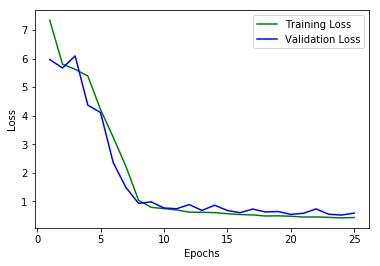

In [47]:
# Plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

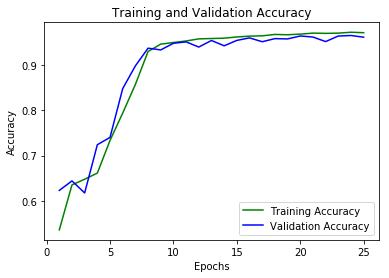

In [48]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
# Examine the confusion
y_pred = model_experiment4.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[ 954,    0,    1,    1,    3,    8,    1,    2,    3,    7],
       [   0, 1110,    4,    3,    0,    1,    1,    5,   11,    0],
       [   6,    1,  984,   11,    4,    1,    3,   12,   10,    0],
       [   0,    0,    8,  974,    1,   12,    0,    7,    5,    3],
       [   0,    1,    5,    0,  948,    0,    1,    3,    4,   20],
       [   2,    0,    0,    7,    3,  872,    3,    1,    2,    2],
       [  12,    3,    1,    1,   14,   18,  903,    2,    4,    0],
       [   0,    3,   19,    5,    1,    0,    0,  987,    1,   12],
       [   3,    0,    4,   18,    6,   21,    1,   11,  904,    6],
       [   3,    4,    0,   13,   11,    9,    0,    9,    4,  956]])

In [50]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.96      0.97      0.96       982
           5       0.93      0.98      0.95       892
           6       0.99      0.94      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.95      0.93      0.94       974
           9       0.95      0.95      0.95      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Which model gives the best accuracy?  Which the best overall F1 score?
Experiment Model 4 has the best accuracy of 97.14%, and Experiment Model 1 being a close second with 95.89%.
Experiment Model 4 has the best F1 score of 0.96, and Experiment Model 1 being a close second with 0.95.

### Which model gives the worst accuracy?  Which the worst overall F1 score?
Experiment Model 3 has the worst accuracy of 69.14%, and the worst F1 score of 0.04.

### What is the shape of the training set?  How many nodes are in the input layer of the network?
The training set is 60,000 images that are 28 x 28 pixels each. This means that the input data is a rank 3 tensor that is 28 x 28 x 60000 in size. There are 784 nodes in the input layer. This is because each picture is a total of 784 pixels (28 x 28).

### Why do you think the best/worst networks are that way?
Experiment Models 1 and 4 use a number of nodes that funnel the data through the neural network in an effective way, leading to the better learning results. Experiment Model 3 is the worst because after the data makes it through the first layer of 200 nodes, it must also be computed through a second layer of 200 nodes, causing an effecient funneling of the data. This causes some confusion in the neural network.

### Experiment and try to create a better performing network.  Explain what you tried and document the results.

Given the accuracy and F1 scores of Experiment Models 1 and 4, it seems as though using 200 nodes in the first hidden layer is the most effective. Model 4 has a slightly higher accuracy and F1 score, leading me to believe that using a second, somewhat smaller hidden layer, is more effective than 1. Starting off, re-run Model 4 with 50 epochs.

In [60]:
model_experiment4 = models.Sequential()
model_experiment4.add(layers.Dense(200, activation = 'relu', input_shape = (784,)))
model_experiment4.add(layers.Dense(100, activation = 'relu'))
model_experiment4.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_experiment4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 50
history = model_experiment4.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 133us/step - loss: 7.5048 - acc: 0.5240 - val_loss: 5.9551 - val_acc: 0.6226
Epoch 2/50
48000/48000 [==============================] - 3s 61us/step - loss: 5.7916 - acc: 0.6343 - val_loss: 5.5273 - val_acc: 0.6520
Epoch 3/50
48000/48000 [==============================] - 3s 62us/step - loss: 5.5513 - acc: 0.6504 - val_loss: 5.4209 - val_acc: 0.6594
Epoch 4/50
48000/48000 [==============================] - 3s 62us/step - loss: 5.4092 - acc: 0.6598 - val_loss: 5.5195 - val_acc: 0.6516
Epoch 5/50
48000/48000 [==============================] - 3s 63us/step - loss: 5.0624 - acc: 0.6804 - val_loss: 4.1946 - val_acc: 0.7322
Epoch 6/50
48000/48000 [==============================] - 3s 63us/step - loss: 3.9937 - acc: 0.7464 - val_loss: 4.4748 - val_acc: 0.7136
Epoch 7/50
48000/48000 [==============================] - 3s 56us/step - loss: 3.8655 - acc: 0.7551 - val_loss: 3.9869 - val_ac

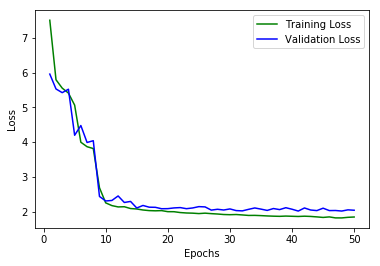

In [61]:
# Plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

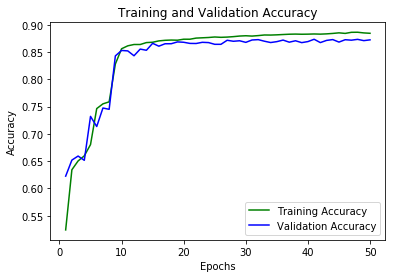

In [62]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [63]:
# Examine the confusion
y_pred = model_experiment4.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[   0,    1,  163,    6,   19,  489,  165,   20,   30,   87],
       [   0, 1126,    0,    3,    0,    1,    3,    0,    2,    0],
       [   0,    5,  948,   15,    6,    6,    3,   22,   25,    2],
       [   0,    1,    2,  977,    0,   12,    0,   12,    6,    0],
       [   0,    0,    1,    0,  963,    0,    7,    1,    1,    9],
       [   0,    0,    0,    3,    1,  876,    6,    1,    4,    1],
       [   0,    1,    0,    1,    6,   19,  928,    0,    3,    0],
       [   0,    5,    5,    2,    2,    0,    0, 1007,    1,    6],
       [   0,    0,    3,    4,    7,    7,    2,    5,  942,    4],
       [   0,    5,    0,    3,   20,    5,    1,   10,    6,  959]])

In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.98      0.99      0.99      1135
           2       0.84      0.92      0.88      1032
           3       0.96      0.97      0.97      1010
           4       0.94      0.98      0.96       982
           5       0.62      0.98      0.76       892
           6       0.83      0.97      0.90       958
           7       0.93      0.98      0.96      1028
           8       0.92      0.97      0.94       974
           9       0.90      0.95      0.92      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.79      0.87      0.83     10000
weighted avg       0.80      0.87      0.83     10000



Running with 50 epochs did not improve the accuracy on Model 4. Given how high the accuracy was on the Control Experiments, I'm thinking less nodes may work better. Next, I'll try cutting the number of nodes in the hidden layers in half, and still running with 50 epochs.

In [66]:
model_experiment4 = models.Sequential()
model_experiment4.add(layers.Dense(100, activation = 'relu', input_shape = (784,)))
model_experiment4.add(layers.Dense(50, activation = 'relu'))
model_experiment4.add(layers.Dense(10, activation = 'softmax'))

# Compile the model
model_experiment4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
eps = 50
history = model_experiment4.fit(x_train_part, y_train_part, batch_size = 1024, epochs = eps, validation_data = (x_train_val, y_train_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 60us/step - loss: 5.6309 - acc: 0.6318 - val_loss: 3.0481 - val_acc: 0.7942
Epoch 2/50
48000/48000 [==============================] - 2s 36us/step - loss: 2.1986 - acc: 0.8464 - val_loss: 1.5598 - val_acc: 0.8857
Epoch 3/50
48000/48000 [==============================] - 2s 38us/step - loss: 1.4204 - acc: 0.8976 - val_loss: 1.2173 - val_acc: 0.9136
Epoch 4/50
48000/48000 [==============================] - 2s 36us/step - loss: 1.1670 - acc: 0.9166 - val_loss: 1.1432 - val_acc: 0.9167
Epoch 5/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.9889 - acc: 0.9284 - val_loss: 0.9932 - val_acc: 0.9281
Epoch 6/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.8467 - acc: 0.9383 - val_loss: 1.0764 - val_acc: 0.9226
Epoch 7/50
48000/48000 [==============================] - 2s 36us/step - loss: 0.7866 - acc: 0.9423 - val_loss: 0.8268 - val_acc

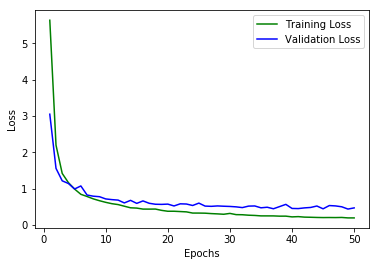

In [67]:
# Plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

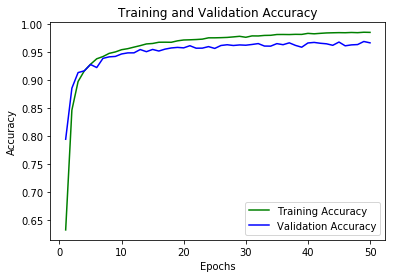

In [68]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [69]:
# Examine the confusion
y_pred = model_experiment4.predict(x_test.reshape(10000, 28 * 28))
y_pred_test = np.argmax(y_pred, axis = 1)

confusion_matrix(y_test, y_pred_test)

array([[ 977,    0,    0,    0,    0,    0,    0,    1,    2,    0],
       [   0, 1119,    1,    2,    0,    0,    2,    1,   10,    0],
       [  11,    3, 1004,    2,    1,    0,    1,    5,    5,    0],
       [   4,    0,    7,  976,    0,    7,    0,    6,    6,    4],
       [   3,    0,    7,    0,  956,    0,    5,    1,    2,    8],
       [  11,    0,    0,    5,    1,  859,    6,    1,    7,    2],
       [  12,    3,    0,    1,    2,    9,  924,    1,    6,    0],
       [   1,    8,   15,    6,    1,    0,    0,  984,    5,    8],
       [   8,    2,    7,    3,    6,    7,    2,    3,  934,    2],
       [  14,    6,    2,    7,   12,   10,    1,    9,   14,  934]])

In [70]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.96      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.97      0.93      0.95      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



With an accuracy of ~98.5%, and an F1 score of 0.97, I can conclude that a 100/50/10 network is one of the best network setups that works for this dataset.